In [50]:
from matplotlib.pyplot import subplots, show
from matplotlib import style
import csv
from numpy import array, linspace
from scipy.optimize import curve_fit

style.use('ggplot')

print("Complete!")

Complete!


In [46]:
keys = ('dV', 'dx', 'dy', 'dz')
with open('results.csv') as f:    
    N, *deltas = zip(*csv.reader(f))  # open csv file and split into two lists
    
    N = array(list(map(int, N)))
    deltas = {k : list(map(float, dx)) for k, dx in zip(keys,deltas)}


print("Loaded!")

Loaded!


In [61]:
expected = lambda x, a, b : a*x**(-0.5) + b

fits = {}

params = {k : curve_fit(expected, N, deltas[k])[0] for k in deltas}
params

{'dV': array([ 3.17762444, -0.00470037]),
 'dx': array([ 0.60826463, -0.00314638]),
 'dy': array([ 0.59538415, -0.00550612]),
 'dz': array([ 0.5515572 , -0.00236506])}

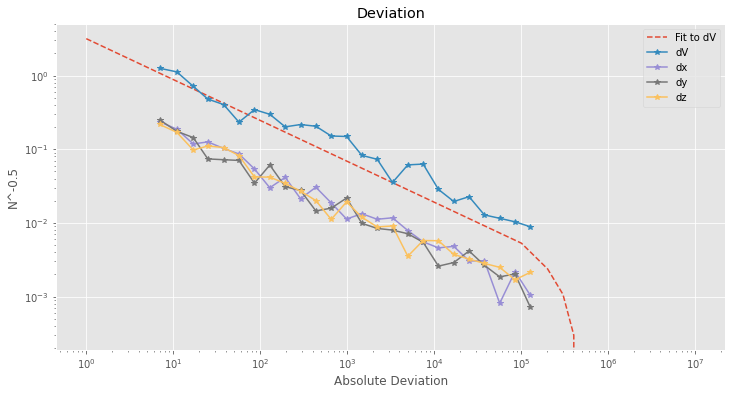

In [64]:
fig, ax = subplots(figsize=(12,6))
x = linspace(1, 1E7, 100)
for k in params:
    if k != "dV":
        continue
    ax.plot(x, expected(x, *params[k]), '--', label=f"Fit to {k}")

for k in keys:
    ax.plot(N, deltas[k], '*-', label=k)
    
ax.set_title("Deviation")
ax.set_xlabel("Absolute Deviation")
ax.set_ylabel("N^-0.5")

ax.legend(loc='best')
ax.set_yscale('log')
ax.set_xscale('log')
show()